In [24]:
from pandas_datareader import data as pdr
import yfinance as yf
import fix_yahoo_finance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm
from math import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import seaborn as sns

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['text.color'] = 'm'
import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [3]:
yf.pdr_override("AAPL")       ## AAPL -> Apple
stock = pdr.get_data_yahoo("AAPL", "2020-03-01","2021-03-01") 
stock.to_csv("stock.csv")
stock.head()

[*********************100%***********************]  1 of 1 completed


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,75.360001,69.430000,70.570000,74.702499,341397200.0,74.127892
2020-03-03,76.000000,71.449997,75.917503,72.330002,319475600.0,71.773636
2020-03-04,75.849998,73.282501,74.110001,75.684998,219178400.0,75.102829
2020-03-05,74.887497,72.852501,73.879997,73.230003,187572800.0,72.666725
2020-03-06,72.705002,70.307503,70.500000,72.257500,226176800.0,71.701706


In [4]:
print("Total day for of trading: ",len(stock))

Total day for of trading:  252


In [5]:
idret=[]
close=stock.Close.tolist()
for i in range(len(close)):
    prev=close[i-1]
    cur=close[i]
    if i==0:
        idret.append(0)
    else:
        idret.append((cur-prev)-1)
if 'Intraday_Return' in stock.columns.tolist():
    stock.drop('Intraday_Return',axis=1)
volatil=[]
stock['Intraday_Return']=idret
stock6=stock.iloc[:126]
std12=np.std(np.array(stock['Intraday_Return']))
volatile12=std12**(0.5)
std6=np.std(np.array(stock6['Intraday_Return']))
volatile6=std6**(0.5)
print("12 Month Volatility of Apple: ",volatile12)
print("6 Month Volatility of Apple: ",volatile6)
volatil.append(volatile6)
volatil.append(volatile12)

12 Month Volatility of Apple:  1.6478442470517278
6 Month Volatility of Apple:  1.5699624554911138


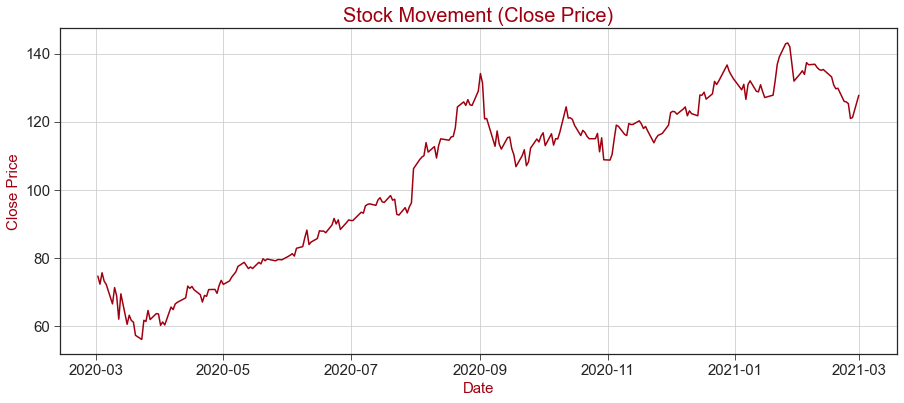

In [6]:
plt.figure(figsize=(15,6))
plt.title("Stock Movement (Close Price)",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Close Price",fontsize=15,color="#9F000F")
plt.plot(stock.Close,"#9F000F")
plt.grid()
plt.show()

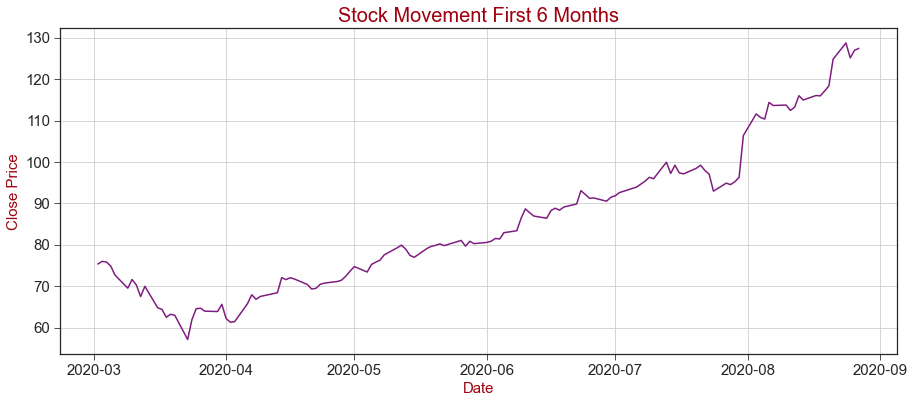

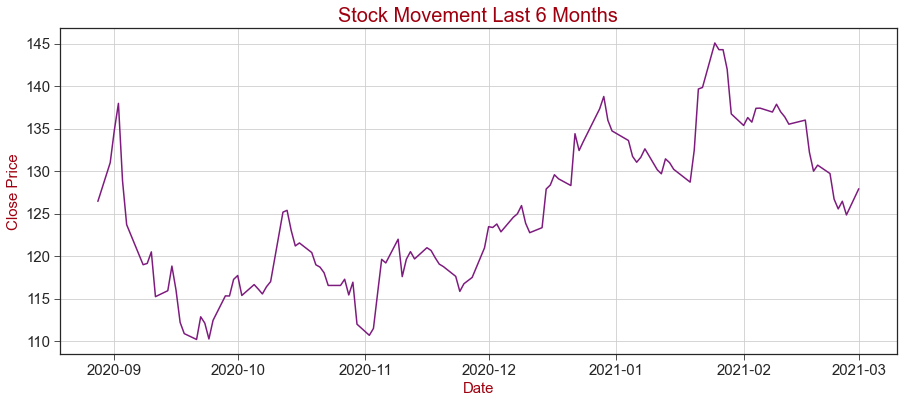

In [7]:
stock6=stock.iloc[:126]
stocka6=stock.iloc[126:]
plt.figure(1,figsize=(15,6))
plt.title("Stock Movement First 6 Months",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Close Price",fontsize=15,color="#9F000F")
plt.plot(stock6.High,"#7D1B7E")
plt.grid()
plt.show()
plt.figure(2,figsize=(15,6))
plt.title("Stock Movement Last 6 Months",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Close Price",fontsize=15,color="#9F000F")
plt.plot(stocka6.High,"#7D1B7E")
plt.grid()
plt.show()

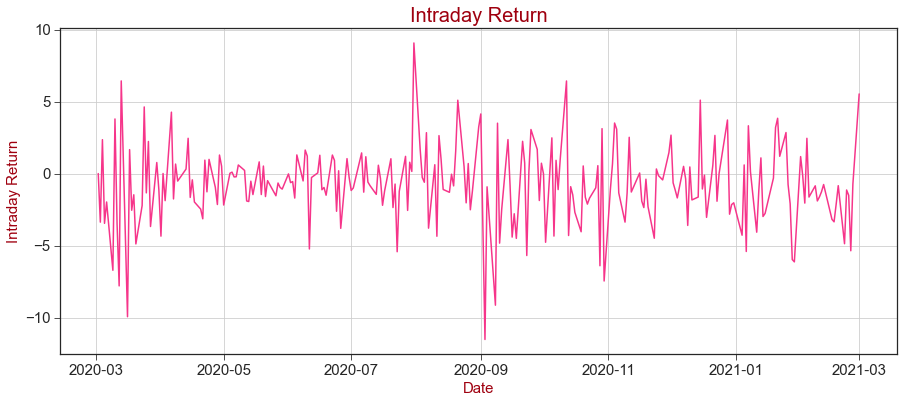

In [8]:
plt.figure(figsize=(15,6))
plt.title("Intraday Return",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Intraday Return",fontsize=15,color="#9F000F")
plt.plot(stock.Intraday_Return,"#F6358A")
plt.grid()
plt.show()

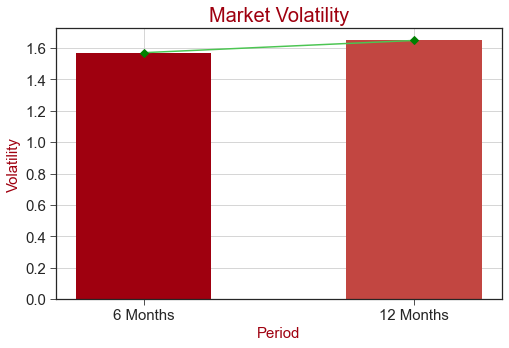

In [9]:
plt.figure(figsize=(8,5))
plt.title("Market Volatility",fontsize=20,color="#9F000F")
plt.xlabel("Period",fontsize=15,color="#9F000F")
plt.ylabel("Volatility",fontsize=15,color="#9F000F")
plt.bar(['6 Months','12 Months'],volatil,width = 0.5,color=['#9F000F','#C24641'])
plt.plot(volatil,"#4CC552")
plt.plot(volatil,"gD")
plt.grid()
plt.show()

## Binomial Tree for Call & Put Option of Cash-or-Nothing

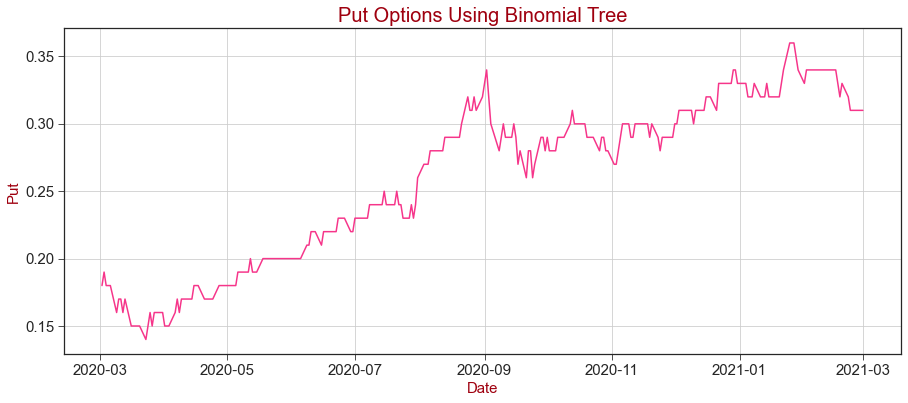

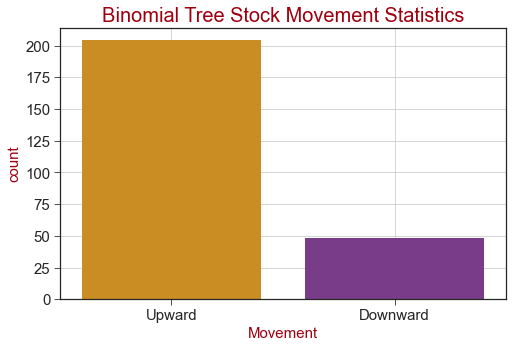

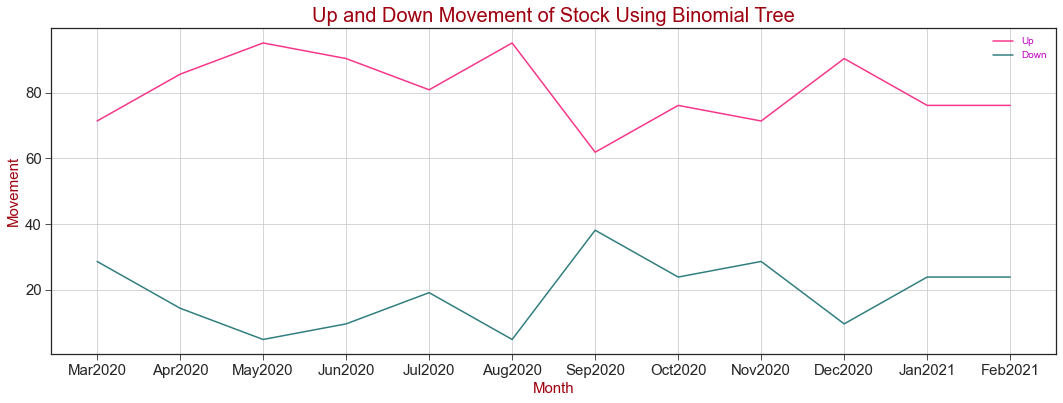

Probability of Upward Move:  80.9525 %
Probability of Downward Move:  19.0475 %


In [10]:
bmt=[]
allmoves=[]
def binom(stk):
    prstk=[]
    for i in range(len(stk)):
        pst=stk.iloc[i,:3].tolist()
        upscale=pst[0] - max (pst[0] - pst[2], 0)
        dnscale=pst[0] - max (pst[1] - pst[2], 0)
        ctoday=round(pst[2] - upscale * np.e ** (-0.03 * 0.0833 ),2)
        prstk.append(ctoday)
    moves=[]
    for i in range(len(prstk)):
        prev=prstk[i-1]
        cur=prstk[i]
        if i==0:
            moves.append("Upward")
        else:
            if prev>cur:
                moves.append("Downward")
            else:
                moves.append("Upward")
    return round(moves.count("Upward")/len(moves),4)*100,round(moves.count("Downward")/len(moves),4)*100,prstk,moves

init_idx=0
end_idx=21
ix=21
tots=int(len(stock)/end_idx)
ups=[]
dns=[]
for i in range(tots):
    stk=stock.iloc[init_idx:end_idx]
    pos=binom(stk)
    bmt.extend(pos[2])
    allmoves.extend(pos[3])
    ups.append(pos[0])
    dns.append(pos[1])
    init_idx=end_idx
    end_idx+=ix

if 'BinomT' in stock.columns.tolist():
        stock.drop('BinomT',axis=1)
stock['BinomT']=bmt
plt.figure(figsize=(15,6))
plt.title("Put Options Using Binomial Tree",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Put",fontsize=15,color="#9F000F")
plt.plot(stock.BinomT,"#F6358A")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Binomial Tree Stock Movement Statistics",fontsize=20,color="#9F000F")
plt.xlabel("Movement",fontsize=15,color="#9F000F")
plt.ylabel("Count",fontsize=15,color="#9F000F")
sns.countplot(allmoves,palette="CMRmap_r")
plt.grid()
plt.show()

mnth=['Mar2020','Apr2020','May2020','Jun2020','Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020','Jan2021','Feb2021']

mvsdf=pd.DataFrame({"Month":mnth,"Ups":ups,"Downs":dns})
mvsdf=mvsdf.reset_index(drop=True)
mvsdf.index=mnth
plt.figure(figsize=(18,6))
plt.title("Up and Down Movement of Stock Using Binomial Tree",fontsize=20,color="#9F000F")
plt.xlabel("Month",fontsize=15,color="#9F000F")
plt.ylabel("Movement",fontsize=15,color="#9F000F")
plt.plot(mvsdf.Ups,"#F6358A",label="Up")
plt.plot(mvsdf.Downs,"#307D7E",label="Down")
plt.legend(loc="upper right")
plt.grid()
plt.show()

print("Probability of Upward Move: ",round(sum(ups)/len(ups),4),"%")
print("Probability of Downward Move: ",round(sum(dns)/len(dns),4),"%")

## Black Scholes Model (BSM) for Call and Put Option of Cash-or-Nothing

#### CallPutFlag - This is set to 'c' for call option, anything else for put
#### S - Stock price
#### K - Strike price
#### T - Time to maturity
#### r - Riskfree interest rate
#### d - Dividend yield
#### v - Volatility

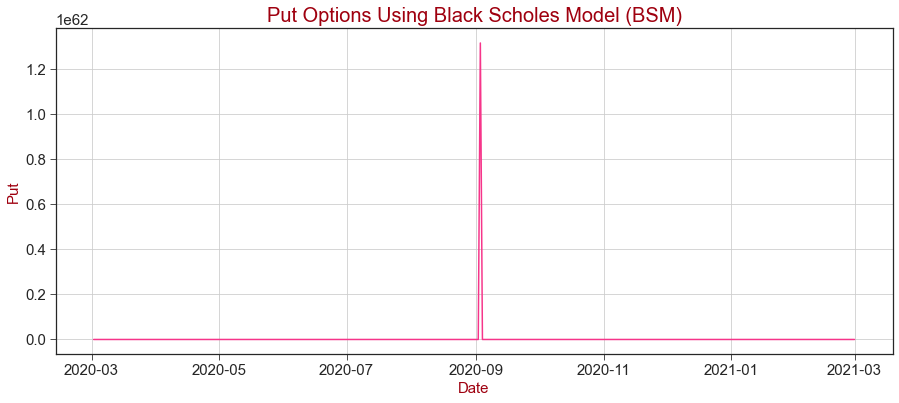

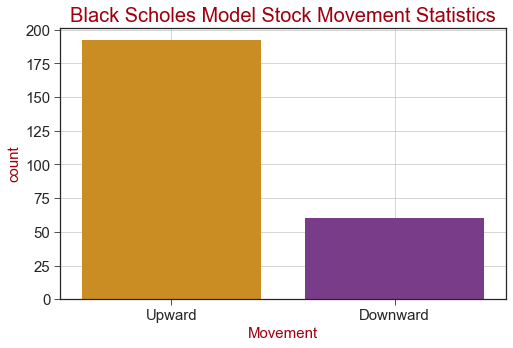

Probability of Upward Move:  76.1905 %
Probability of Downward Move:  23.8095 %


In [11]:
def BlackScholes(CF,S,K,T,r,d,v):
    d1 = (log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*sqrt(T))
    d2 = d1-v*sqrt(T)
    if CF=='c':
        try:
            return round(S*exp(-d*T)*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2),2)
        except:
            return np.random.random(1)[0]
    else:
        try:
            return round(K*exp(-r*T)*norm.cdf(-d2)-S*exp(-d*T)*norm.cdf(-d1),2)
        except:
            return np.random.random(1)[0]

init_idx=0
end_idx=21
ix=21
tots=int(len(stock)/end_idx)
bsm = []
cls=stock.Close.tolist()
hg=stock.High.tolist()
T=12
r=0.03
bsmup=[]
bsmdn=[]
upval=[]
dnval=[]
for i in range(len(cls)):
    if i == 0:
        val=0
        bsm.append(0)
    else:
        val=BlackScholes('c', cls[i], hg[i], T, r, idret[i], volatile12)
        bsm.append(BlackScholes('c', cls[i], hg[i], T, r, idret[i], volatile12))
    if val>np.quantile(np.array(bsm),0.1):
        bsmup.append("Upward")
        upval.append(val)
    else:
        dnval.append(val)
        bsmdn.append("Downward")
    allbsms=bsmup+bsmdn
if 'BSM' in stock.columns.tolist():
    stock.drop('BSM',axis=1)
stock['BSM']=bsm
plt.figure(figsize=(15,6))
plt.title("Put Options Using Black Scholes Model (BSM)",fontsize=20,color="#9F000F")
plt.xlabel("Date",fontsize=15,color="#9F000F")
plt.ylabel("Put",fontsize=15,color="#9F000F")
plt.plot(stock.BSM,"#F6358A")
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.title("Black Scholes Model Stock Movement Statistics",fontsize=20,color="#9F000F")
plt.xlabel("Movement",fontsize=15,color="#9F000F")
plt.ylabel("Count",fontsize=15,color="#9F000F")
sns.countplot(allbsms,palette="CMRmap_r")
plt.grid()
plt.show()

hgprob=allbsms.count("Upward")/len(allbsms)
loprob=allbsms.count("Downward")/len(allbsms)
print("Probability of Upward Move: ",round(hgprob*100,4),"%")
print("Probability of Downward Move: ",round(loprob*100,4),"%")

In [12]:
np.random.random(1)[0]

0.6170669930805216

## Calculating Greeks for Stock

#### Delta-> dlt: partial wrt S
#### Gamma-> gm: second partial wrt S
#### Theta-> th: partial wrt T
#### Vega-> vg: partial wrt v
#### Rho-> rh: partial wrt r

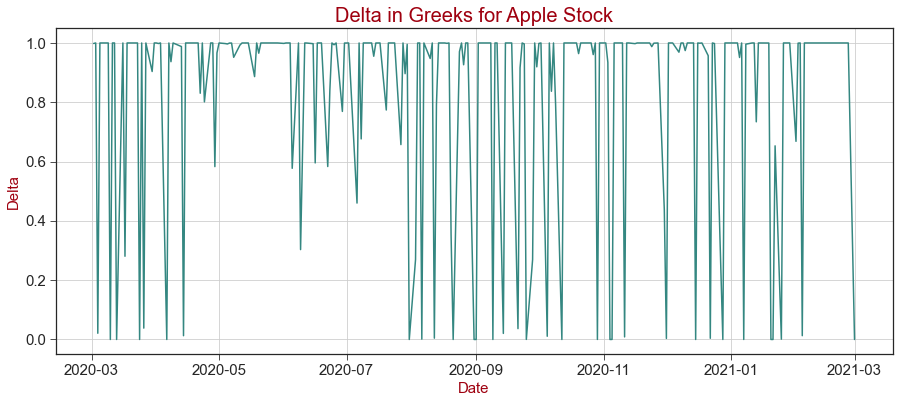

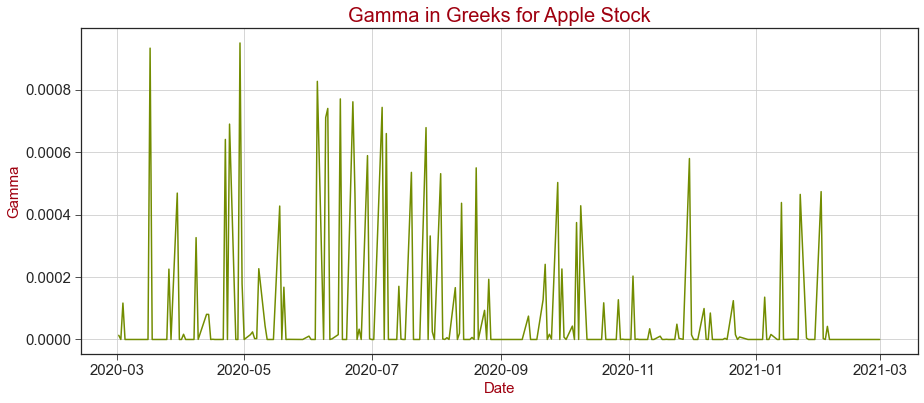

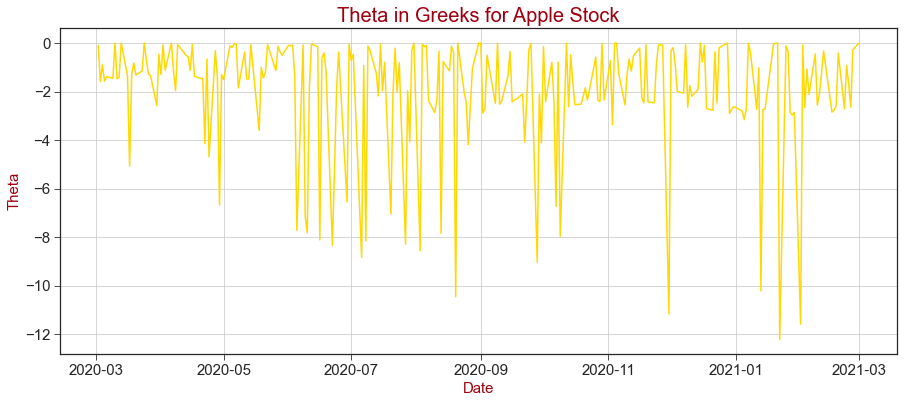

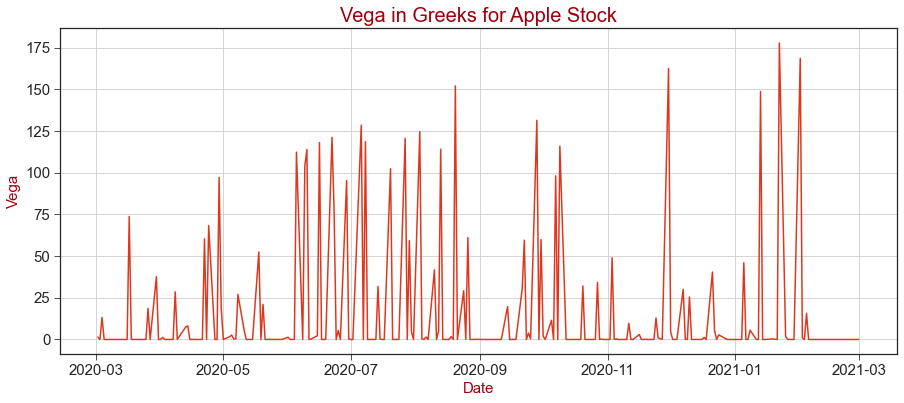

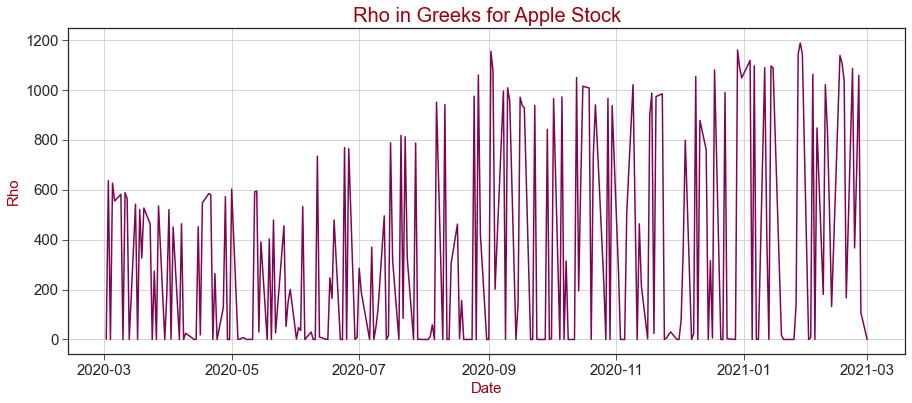

,Delta,Gamma,Theta,Vega,Rho
Date,,,,,
2020-03-02,0.998225,1.333697e-05,-0.105172,1.471719e+00,1.649334e+00
2020-03-03,1.000000,1.897161e-25,-1.590688,1.962631e-20,6.362751e+02
2020-03-04,0.020984,1.167241e-04,-0.907784,1.322141e+01,3.103858e-12
2020-03-05,1.000000,3.105824e-26,-1.567411,3.293460e-21,6.269643e+02
2020-03-06,1.000000,1.424723e-14,-1.388130,1.470936e-09,5.552521e+02


In [23]:
prms=["Delta","Gamma","Theta","Vega","Rho"]
gkval=[[] for i in range(len(prms))]
def Greeks(S,K,T,r,d,v):
    T_sqrt = sqrt(T)
    d1 = (log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*T_sqrt)
    d2 = d1-v*T_sqrt
    dlt = norm.cdf(d1)
    gm = norm.pdf(d1)/(S*v*T_sqrt)
    th =- (S*v*norm.pdf(d1))/(2*T_sqrt) - r*K*exp( -r*T)*norm.cdf(d2)
    vg = S * T_sqrt*norm.pdf(d1)
    rh = K*T*exp(-r*T)*norm.cdf(d2)
    return dlt,gm,th,vg,rh

greeks=[[] for i in range(len(prms))]
for i in range(len(stock)):
    pres_greeks=list(Greeks(cls[i], hg[i], T, r, idret[i], volatile12))
    for k in range(len(prms)):
        greeks[k].append(pres_greeks[k])
dct={
    prms[i]:greeks[i]
    for i in range(len(prms))
}
greekdf=pd.DataFrame(dct)
greekdf=greekdf.reset_index(drop=True)
greekdf.index=stock.index
greekdf.to_csv("greek.csv")

cols=["#348781","#728C00","#FFD801","#DC381F","#7D0552"]

for i in range(len(prms)):
    plt.figure(figsize=(15,6))
    plt.title("{} in Greeks for Apple Stock".format(prms[i]),fontsize=20,color="#9F000F")
    plt.xlabel("Date",fontsize=15,color="#9F000F")
    plt.ylabel("{}".format(prms[i]),fontsize=15,color="#9F000F")
    plt.plot(greekdf[prms[i]],cols[i])
    plt.grid()
    plt.show()
greekdf.head()